# Graph-Isomorphism Problem

Before we can talk about the Graph-Isomorphism problem we must state what these terms in graph theory mean.

Graph: Graph is a mathematical representation of a network and it describes the relationship between lines and points. A graph consists of some points and lines between them. The length of the lines and position of the points do not matter. Each object in a graph is called a node. [[1]](https://economictimes.indiatimes.com/definition/graph-theory)

Vertex: Vetex also known as a node represents a point on graph. Vertices is the plural term of multiple vertex in a graph. [[2]](https://www.tutorialspoint.com/edges-and-vertices-of-graph)

Edges: Are the set of lines which interconnect the vertices. A degree of a vertex is the amount of edges connecting it. [[2]](https://www.tutorialspoint.com/edges-and-vertices-of-graph)

The Diagram below shows A graph with 6 vertices and 7 edges: [[3]](https://en.wikipedia.org/wiki/Vertex_(graph_theory))



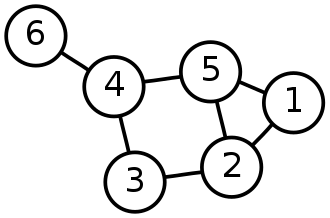

# References

Graph theory https://economictimes.indiatimes.com/definition/graph-theory [1]

vertices and edges https://www.tutorialspoint.com/edges-and-vertices-of-graph [2]

vertix graph theory https://en.wikipedia.org/wiki/Vertex_(graph_theory) [3]